<a href="https://colab.research.google.com/github/shreyasjoshi2003/stock-price-red/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10463,2022-06-13,131.880005
10464,2022-06-14,132.759995
10465,2022-06-15,135.429993
10466,2022-06-16,130.059998


In [4]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10463    2022-06-13
10464    2022-06-14
10465    2022-06-15
10466    2022-06-16
10467    2022-06-17
Name: Date, Length: 10468, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1980-12-12')
datetime_object

datetime.datetime(1980, 12, 12, 0, 0)

In [6]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10463    2022-06-13
10464    2022-06-14
10465    2022-06-15
10466    2022-06-16
10467    2022-06-17
Name: Date, Length: 10468, dtype: object

In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10463   2022-06-13
10464   2022-06-14
10465   2022-06-15
10466   2022-06-16
10467   2022-06-17
Name: Date, Length: 10468, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-06-13,131.880005
2022-06-14,132.759995
2022-06-15,135.429993


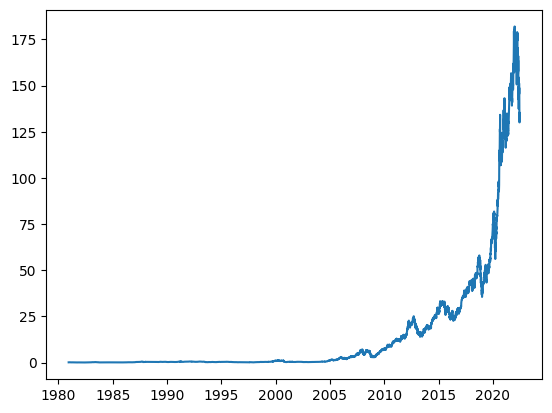

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
plt.show()

In [10]:
import pandas as pd
import numpy as np

def create_dataframe(X, Y, dates, n):
    ret_df = pd.DataFrame({})
    ret_df['Target date'] = dates

    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df




In [11]:
import pandas as pd

def df_to_windowed_df(df, start_date, end_date, n):
    df['date'] = pd.to_datetime(df['date'])

    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    filtered_df = df.loc[mask]


    windowed_data = []
    for i in range(len(filtered_df) - n + 1):
        window = filtered_df.iloc[i:i+n]
        windowed_data.append(window)


    windowed_df = pd.concat(windowed_data, ignore_index=True)

    return windowed_df


data = {
    'date': pd.date_range(start='1980-12-12', periods=10),
    'value': range(10)
}
df = pd.DataFrame(data)


windowed_df = df_to_windowed_df(df, '1980-12-12', '2022-06-17', n=3)
print(windowed_df)


         date  value
0  1980-12-12      0
1  1980-12-13      1
2  1980-12-14      2
3  1980-12-13      1
4  1980-12-14      2
5  1980-12-15      3
6  1980-12-14      2
7  1980-12-15      3
8  1980-12-16      4
9  1980-12-15      3
10 1980-12-16      4
11 1980-12-17      5
12 1980-12-16      4
13 1980-12-17      5
14 1980-12-18      6
15 1980-12-17      5
16 1980-12-18      6
17 1980-12-19      7
18 1980-12-18      6
19 1980-12-19      7
20 1980-12-20      8
21 1980-12-19      7
22 1980-12-20      8
23 1980-12-21      9


In [12]:
def windowed_df_to_X_y(windowed_df):
   df_as_np = windowed_df.to_numpy()

   dates = df_as_np[:, 0]

   middle_matrix = df_as_np[:, 1:-1]
   X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1 ))

   Y = df_as_np[:, -1]

   return dates, X.astype(np.float32), Y.astype(np.float32)

dates , X, y = windowed_df_to_X_y(windowed_df)

dates.shape, X.shape, y.shape



((24,), (24, 0, 1), (24,))

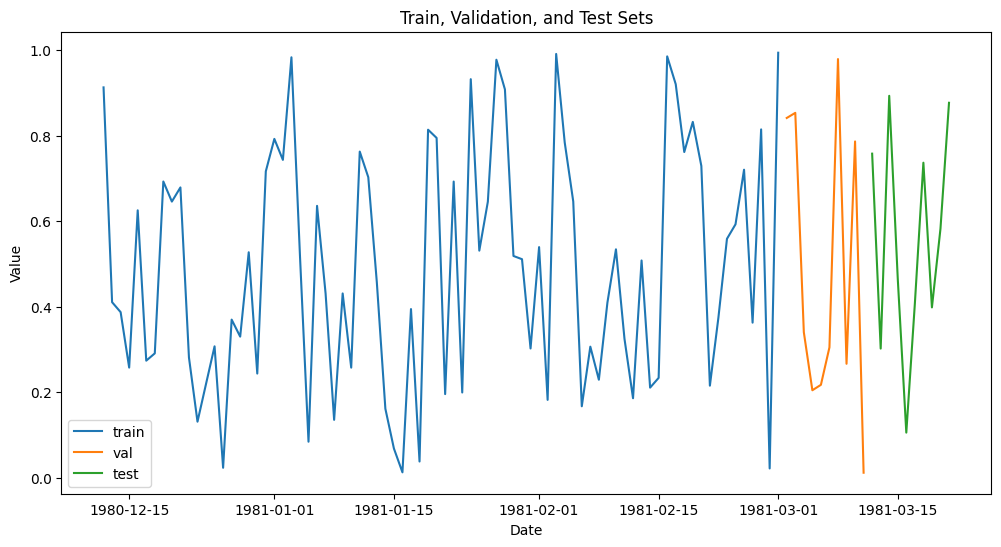

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dates = pd.date_range(start='1980-12-12', periods=100, freq='D')
X = np.random.rand(100, 10)
y = np.random.rand(100)
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(12, 6))
plt.plot(dates_train, y_train, label='train')
plt.plot(dates_val, y_val, label='val')
plt.plot(dates_test, y_test, label='test')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train, Validation, and Test Sets')
plt.show()


X_train shape: (80, 3, 1)
X_val shape: (10, 3, 1)
y_train shape: (80,)
y_val shape: (10,)


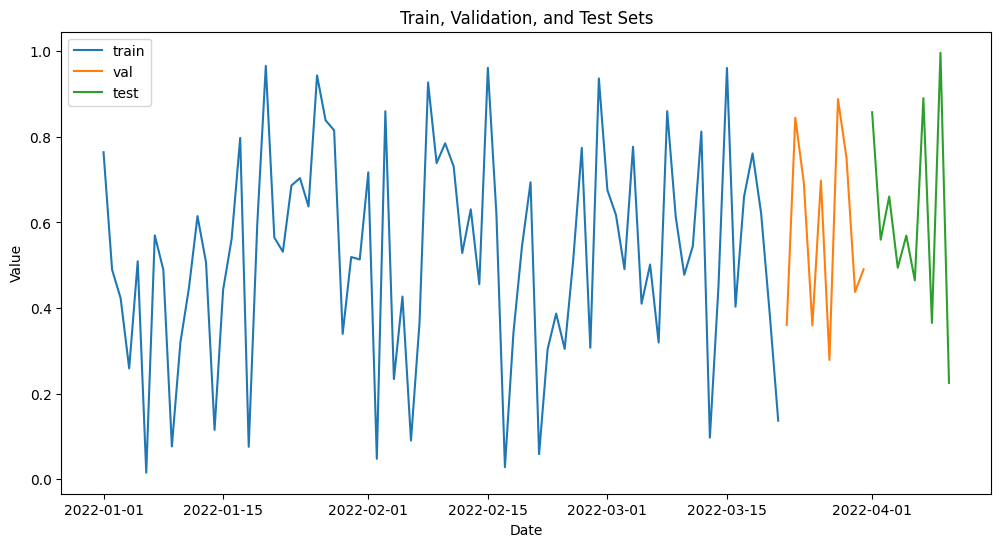

Epoch 1/1000
3/3 [==============================] - 17s 269ms/step - loss: 0.3321 - mean_absolute_error: 0.5198 - val_loss: 0.3386 - val_mean_absolute_error: 0.5434
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.2904 - mean_absolute_error: 0.4812 - val_loss: 0.3000 - val_mean_absolute_error: 0.5068
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2555 - mean_absolute_error: 0.4461 - val_loss: 0.2582 - val_mean_absolute_error: 0.4641
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2188 - mean_absolute_error: 0.4101 - val_loss: 0.2142 - val_mean_absolute_error: 0.4145
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.1815 - mean_absolute_error: 0.3697 - val_loss: 0.1684 - val_mean_absolute_error: 0.3558
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.1441 - mean_absolute_error: 0.3266 - val_loss: 0.1241 - val_mean_absolute_error: 0.2877
Epoch 7/1000
3/3 [==

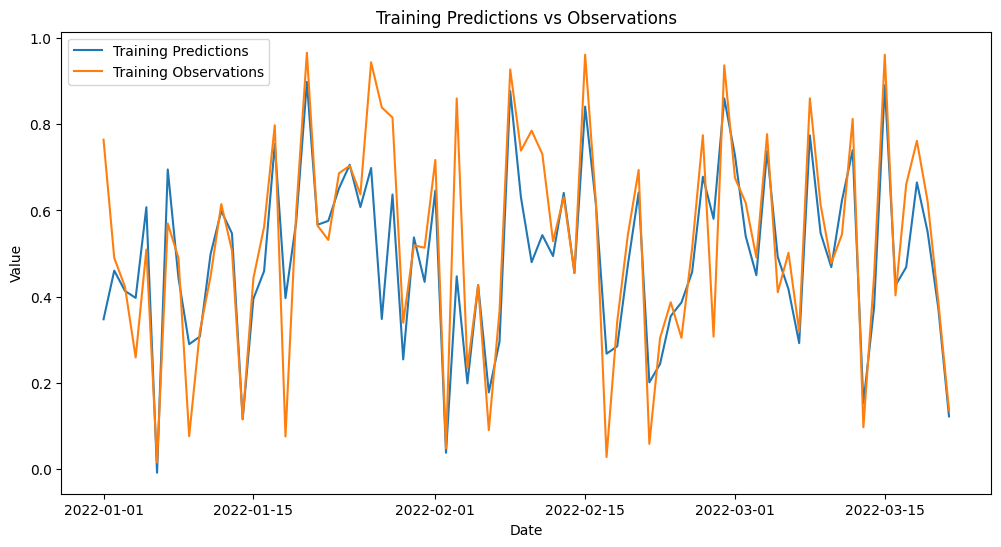

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Generate example dates and data (replace with your actual data)
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
X = np.random.rand(100, 3, 1)  # Example feature data
y = np.random.rand(100)        # Example target data

# Split the data into training, validation, and test sets
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Check the shapes of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# Plot the data
plt.figure(figsize=(12, 6))  # Optional: for better plot size
plt.plot(dates_train, y_train, label='train')
plt.plot(dates_val, y_val, label='val')
plt.plot(dates_test, y_test, label='test')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train, Validation, and Test Sets')
plt.show()

# Define and compile the model
model = Sequential([
    layers.Input(shape=(3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    verbose=1
)

# Make predictions on the training data
train_predictions = model.predict(X_train).flatten()

# Check the shapes of predictions and actual values
print(f"train_predictions shape: {train_predictions.shape}")
print(f"y_train shape: {y_train.shape}")

# Plot the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(dates_train, train_predictions, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Training Predictions vs Observations')
plt.show()


3/3 [==============================] - 0s 3ms/step


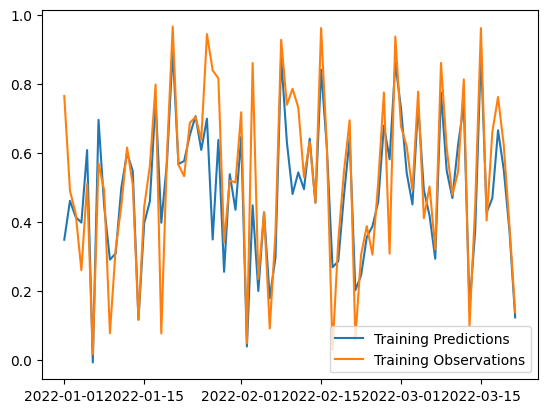

In [21]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 19ms/step


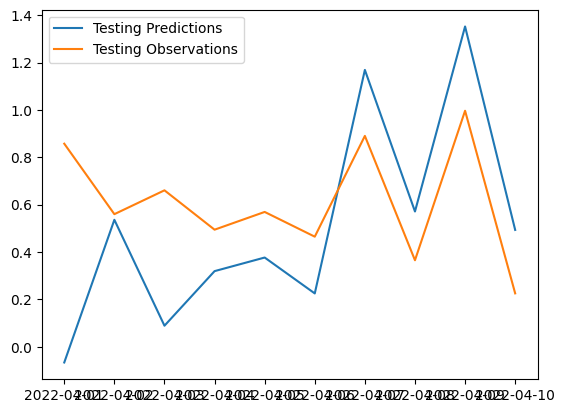

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

1/1 [==============================] - 0s 20ms/step


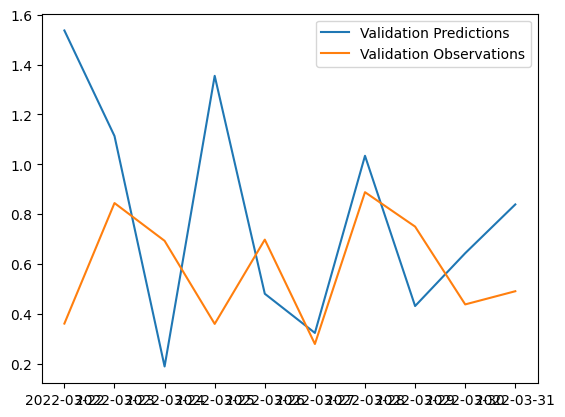

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

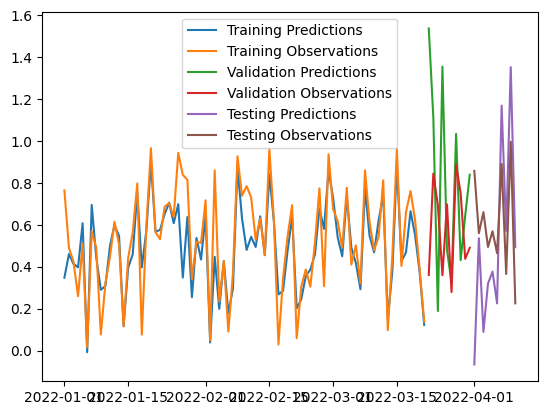

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [25]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


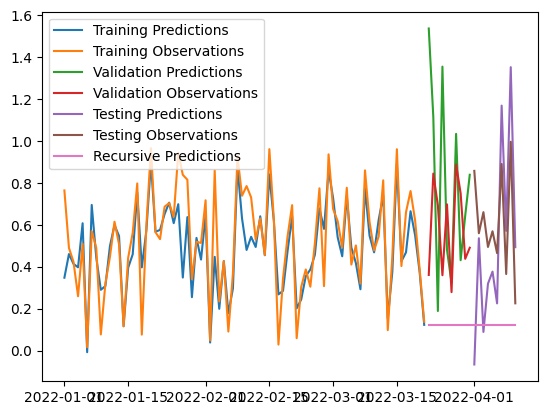

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])